Trying to find where men lost the average life expectancy against women. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
%matplotlib inline

In [2]:
# load disease description for each Icd10Code
dficd = pd.read_csv('../input/Icd10Code.csv')

dataset =  pd.read_csv('../input/DeathRecords.csv', header=0)
print(len(dataset))

2631171


In [3]:
mannerofdeath = pd.read_csv('../input/MannerOfDeath.csv')

In [4]:
print(mannerofdeath)

   Code            Description
0     1               Accident
1     2                Suicide
2     3               Homicide
3     4  Pending investigation
4     5    Could not determine
5     6         Self-Inflicted
6     7                Natural
7     0          Not specified


In [5]:
#cleaning data with bad age death, bad days of the week and not natural deaths.
df = dataset[dataset.Age < 120][dataset.DayOfWeekOfDeath < 8][~dataset.MannerOfDeath.isin([1,2,3,6])]
print(len(df))

2437935


In [6]:
# number of deaths by sex
print('men deaths in the dataset:', len(df[df.Sex == 'M']))
print('women deaths in the dataset:', len(df[df.Sex == 'F']))

men deaths in the dataset: 1200087
women deaths in the dataset: 1237848


In [7]:
print (df[df.Sex == 'M'].Age.mean())
print (df[df.Sex == 'F'].Age.mean())

72.37584858431097
77.52070690424026


There are 5 years of difference in life expectancy between men a women in the US. The number of deaths are more or less the same between them.

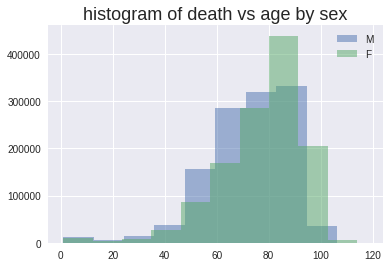

In [8]:
plt.figure()
plt.title('histogram of death vs age by sex', fontsize=18)
_ = plt.hist(df[df.Sex == 'M'].Age.tolist(), 10, alpha=0.5, label='M')
_ = plt.hist(df[df.Sex == 'F'].Age.tolist(), 10, alpha=0.5, label='F')
_ = plt.legend()

it seems there are more difference in the 50s and 60s than in the 70s. Let's see that in numbers

In [9]:
malesDeaths  = df[df.Sex == 'M']
femaleDeaths = df[df.Sex == 'F']

for i in range(0, 10):
    print("age between ",i*10,(i+1)*10,"difference in deaths (men deaths - women deaths):", len(malesDeaths[np.logical_and(malesDeaths.Age>i*10,malesDeaths.Age<(i+1)*10)])-len(femaleDeaths[np.logical_and(femaleDeaths.Age>i*10,femaleDeaths.Age<(i+1)*10)]))

age between  0 10 difference in deaths (men deaths - women deaths): 2195
age between  10 20 difference in deaths (men deaths - women deaths): 798
age between  20 30 difference in deaths (men deaths - women deaths): 2479
age between  30 40 difference in deaths (men deaths - women deaths): 3250
age between  40 50 difference in deaths (men deaths - women deaths): 10719
age between  50 60 difference in deaths (men deaths - women deaths): 43076
age between  60 70 difference in deaths (men deaths - women deaths): 62734
age between  70 80 difference in deaths (men deaths - women deaths): 35660
age between  80 90 difference in deaths (men deaths - women deaths): -61873
age between  90 100 difference in deaths (men deaths - women deaths): -120765


## So the peak between men and women death difference is in their sixties. 

## Let's analyze what's happening in the 60s with men

In [10]:
malesDeaths60s=malesDeaths[malesDeaths.Age>=60][malesDeaths.Age<70]
dficd.columns= ['Icd10Code', 'dx']
malesDeaths60s =  pd.merge(malesDeaths60s, dficd, how='left', on='Icd10Code')

In [11]:
print ("number of men deaths in 60s",len(malesDeaths60s))

number of men deaths in 60s 232459


In [12]:
men60counts = malesDeaths60s[['Icd10Code', 'Id']].groupby(['Icd10Code'], as_index=False).count()

In [13]:
most_common_causes = pd.merge(men60counts, dficd, how='left', on='Icd10Code')
most_common_causes = most_common_causes.sort_values(by=['Id'],ascending=False)
most_common_causes.head(15)

,Icd10Code,Id,dx
237,C349,23961,"Malignant neoplasm: Bronchus or lung, unspecified"
864,I219,14724,"Acute myocardial infarction, unspecified"
869,I251,13862,Atherosclerotic heart disease
868,I250,9635,"Atherosclerotic cardiovascular disease, so des..."
1112,J449,9630,"Chronic obstructive pulmonary disease, unspeci..."
218,C259,6017,"Malignant neoplasm: Pancreas, unspecified"
197,C189,4977,"Malignant neoplasm: Colon, unspecified"
289,C61,4660,Malignant neoplasm of prostate
579,E149,4204,Unspecified diabetes mellitus: Without complic...
183,C159,3826,"Malignant neoplasm: Oesophagus, unspecified"


## Let's analyze what's happening in the 60s with women

In [14]:
femaleDeaths60s=femaleDeaths[femaleDeaths.Age>=60][femaleDeaths.Age<70]
dficd.columns= ['Icd10Code', 'dx']
femaleDeaths60s =  pd.merge(femaleDeaths60s, dficd, how='left', on='Icd10Code')

In [15]:
print ("number of women deaths in 60s",len(femaleDeaths60s))

number of women deaths in 60s 162882


In [16]:
women60counts = femaleDeaths60s[['Icd10Code', 'Id']].groupby(['Icd10Code'], as_index=False).count()

In [17]:
most_common_causes = pd.merge(women60counts, dficd, how='left', on='Icd10Code')
most_common_causes = most_common_causes.sort_values(by=['Id'],ascending=False)
most_common_causes.head(15)

,Icd10Code,Id,dx
213,C349,17648,"Malignant neoplasm: Bronchus or lung, unspecified"
260,C509,9778,"Malignant neoplasm: Breast, unspecified"
1058,J449,8833,"Chronic obstructive pulmonary disease, unspeci..."
821,I219,6700,"Acute myocardial infarction, unspecified"
825,I251,6117,Atherosclerotic heart disease
195,C259,4487,"Malignant neoplasm: Pancreas, unspecified"
269,C56,3686,Malignant neoplasm of ovary
824,I250,3539,"Atherosclerotic cardiovascular disease, so des..."
174,C189,3513,"Malignant neoplasm: Colon, unspecified"
32,A419,3099,"Sepsis, unspecified"


----------

## Conclusion

Although there is no clear factor for the difference in the 60s mortality between men and women, seems like heart diseases are the main group that adds deaths to the men side and not to women side. 

- men died because of heart diseases:         38221. 
- women died because of heart diseases :   16356.


Other common illnesses are just more agressive with men than women. But it is worth to say that women have their our illnesses group but their life have more chances to pass to the 70s.